# Librerías

In [0]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# 1 Lectura de los datos

In [31]:
import pandas as pd

url = "https://raw.githubusercontent.com/laar19/machine-learning/master/aprendizaje%20no%20supervizado/datos/cc_data.csv"
data = pd.read_csv(url)

print(data.shape) # Retorna las dimensiones del dataframe (filas y columnas)
data.head()       # Por defecto, imprime las 5 primeras filas

(8950, 18)


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [32]:
data.shape

(8950, 18)

In [33]:
# Información estadística de las características
data.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [34]:
# Tipo de dato por variable
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
CUST_ID                             8950 non-null object
BALANCE                             8950 non-null float64
BALANCE_FREQUENCY                   8950 non-null float64
PURCHASES                           8950 non-null float64
ONEOFF_PURCHASES                    8950 non-null float64
INSTALLMENTS_PURCHASES              8950 non-null float64
CASH_ADVANCE                        8950 non-null float64
PURCHASES_FREQUENCY                 8950 non-null float64
ONEOFF_PURCHASES_FREQUENCY          8950 non-null float64
PURCHASES_INSTALLMENTS_FREQUENCY    8950 non-null float64
CASH_ADVANCE_FREQUENCY              8950 non-null float64
CASH_ADVANCE_TRX                    8950 non-null int64
PURCHASES_TRX                       8950 non-null int64
CREDIT_LIMIT                        8949 non-null float64
PAYMENTS                            8950 non-null float64
MINIMUM_PAYMENTS            

In [35]:
# Correlación entre las columnas
data.corr()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.000000,0.322412,0.181261,0.164350,0.126469,0.496692,-0.077944,0.073166,-0.063186,0.449218,0.385152,0.154338,0.531283,0.322802,0.398684,-0.318959,0.072692
BALANCE_FREQUENCY,0.322412,1.000000,0.133674,0.104323,0.124292,0.099388,0.229715,0.202415,0.176079,0.191873,0.141555,0.189626,0.095843,0.065008,0.132569,-0.095082,0.119776
PURCHASES,0.181261,0.133674,1.000000,0.916845,0.679896,-0.051474,0.393017,0.498430,0.315567,-0.120143,-0.067175,0.689561,0.356963,0.603264,0.093860,0.180379,0.086288
ONEOFF_PURCHASES,0.164350,0.104323,0.916845,1.000000,0.330622,-0.031326,0.264937,0.524891,0.127729,-0.082628,-0.046212,0.545523,0.319724,0.567292,0.048755,0.132763,0.064150
INSTALLMENTS_PURCHASES,0.126469,0.124292,0.679896,0.330622,1.000000,-0.064244,0.442418,0.214042,0.511351,-0.132318,-0.073999,0.628108,0.256499,0.384084,0.132172,0.182569,0.086143
CASH_ADVANCE,0.496692,0.099388,-0.051474,-0.031326,-0.064244,1.000000,-0.215507,-0.086754,-0.177070,0.628522,0.656498,-0.075850,0.303985,0.453238,0.140107,-0.152935,-0.068312
PURCHASES_FREQUENCY,-0.077944,0.229715,0.393017,0.264937,0.442418,-0.215507,1.000000,0.501343,0.862934,-0.308478,-0.203478,0.568430,0.119788,0.103464,0.003030,0.305802,0.061506
ONEOFF_PURCHASES_FREQUENCY,0.073166,0.202415,0.498430,0.524891,0.214042,-0.086754,0.501343,1.000000,0.142329,-0.111716,-0.069088,0.544869,0.295038,0.243537,-0.030327,0.157531,0.082466
PURCHASES_INSTALLMENTS_FREQUENCY,-0.063186,0.176079,0.315567,0.127729,0.511351,-0.177070,0.862934,0.142329,1.000000,-0.262958,-0.169207,0.529975,0.060755,0.085551,0.030073,0.250087,0.073275
CASH_ADVANCE_FREQUENCY,0.449218,0.191873,-0.120143,-0.082628,-0.132318,0.628522,-0.308478,-0.111716,-0.262958,1.000000,0.799561,-0.131168,0.132616,0.183192,0.098838,-0.249773,-0.133372


In [36]:
# Detecta valores faltantes
data.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [37]:
# Retorna la media de las columnas
data.median()

BALANCE                              873.385231
BALANCE_FREQUENCY                      1.000000
PURCHASES                            361.280000
ONEOFF_PURCHASES                      38.000000
INSTALLMENTS_PURCHASES                89.000000
CASH_ADVANCE                           0.000000
PURCHASES_FREQUENCY                    0.500000
ONEOFF_PURCHASES_FREQUENCY             0.083333
PURCHASES_INSTALLMENTS_FREQUENCY       0.166667
CASH_ADVANCE_FREQUENCY                 0.000000
CASH_ADVANCE_TRX                       0.000000
PURCHASES_TRX                          7.000000
CREDIT_LIMIT                        3000.000000
PAYMENTS                             856.901546
MINIMUM_PAYMENTS                     312.343947
PRC_FULL_PAYMENT                       0.000000
TENURE                                12.000000
dtype: float64

# 2 Preparación de los datos

In [38]:
# Se imputan los valores faltantes con la media
data = data.fillna(data.median())

#data["CREDIT_LIMIT"].fillna(data["CREDIT_LIMIT"].median(), inplace=True)
#data["CREDIT_LIMIT"].count()

#data["MINIMUM_PAYMENTS"].median()
#data["MINIMUM_PAYMENTS"].fillna(data["MINIMUM_PAYMENTS"].median(), inplace=True)

# Chequea de nuevo si hay valores faltantes
data.isnull().any()

CUST_ID                             False
BALANCE                             False
BALANCE_FREQUENCY                   False
PURCHASES                           False
ONEOFF_PURCHASES                    False
INSTALLMENTS_PURCHASES              False
CASH_ADVANCE                        False
PURCHASES_FREQUENCY                 False
ONEOFF_PURCHASES_FREQUENCY          False
PURCHASES_INSTALLMENTS_FREQUENCY    False
CASH_ADVANCE_FREQUENCY              False
CASH_ADVANCE_TRX                    False
PURCHASES_TRX                       False
CREDIT_LIMIT                        False
PAYMENTS                            False
MINIMUM_PAYMENTS                    False
PRC_FULL_PAYMENT                    False
TENURE                              False
dtype: bool

In [39]:
# ONEOFF_PURCHASES      : Monto máximo de una compra realizada en una sola vez
# INSTALLMENTS_PURCHASES: Monto de una compra realizada para ser cancelada en cuotas

print("Cantidad de personas que NO hicieron compras a crédito: ",
      data[(data["ONEOFF_PURCHASES"]==0) & (data["INSTALLMENTS_PURCHASES"]==0)].shape)

print("Cantidad de personas que SÍ hicieron compras a crédito, y para ser canceladas en cuotas: ",
      data[(data["ONEOFF_PURCHASES"]>0) & (data["INSTALLMENTS_PURCHASES"]>0)].shape)

print("Cantidad de personas que SÍ hicieron compras a crédito, pero NO para ser canceladas en cuotas: ",
      data[(data["ONEOFF_PURCHASES"]>0) & (data["INSTALLMENTS_PURCHASES"]==0)].shape)

print("Cantidad de personas que hicieron compras a crédito sólo para ser canceladas en cuotas: ",
      data[(data["ONEOFF_PURCHASES"]==0) & (data["INSTALLMENTS_PURCHASES"]>0)].shape)

Cantidad de personas que NO hicieron compras a crédito:  (2042, 18)
Cantidad de personas que SÍ hicieron compras a crédito, y para ser canceladas en cuotas:  (2774, 18)
Cantidad de personas que SÍ hicieron compras a crédito, pero NO para ser canceladas en cuotas:  (1874, 18)
Cantidad de personas que hicieron compras a crédito sólo para ser canceladas en cuotas:  (2260, 18)


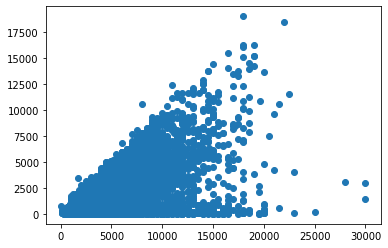

In [40]:
# Ubicación de los compradores en comparación con su balance
plt.scatter(data["CREDIT_LIMIT"], data["BALANCE"])

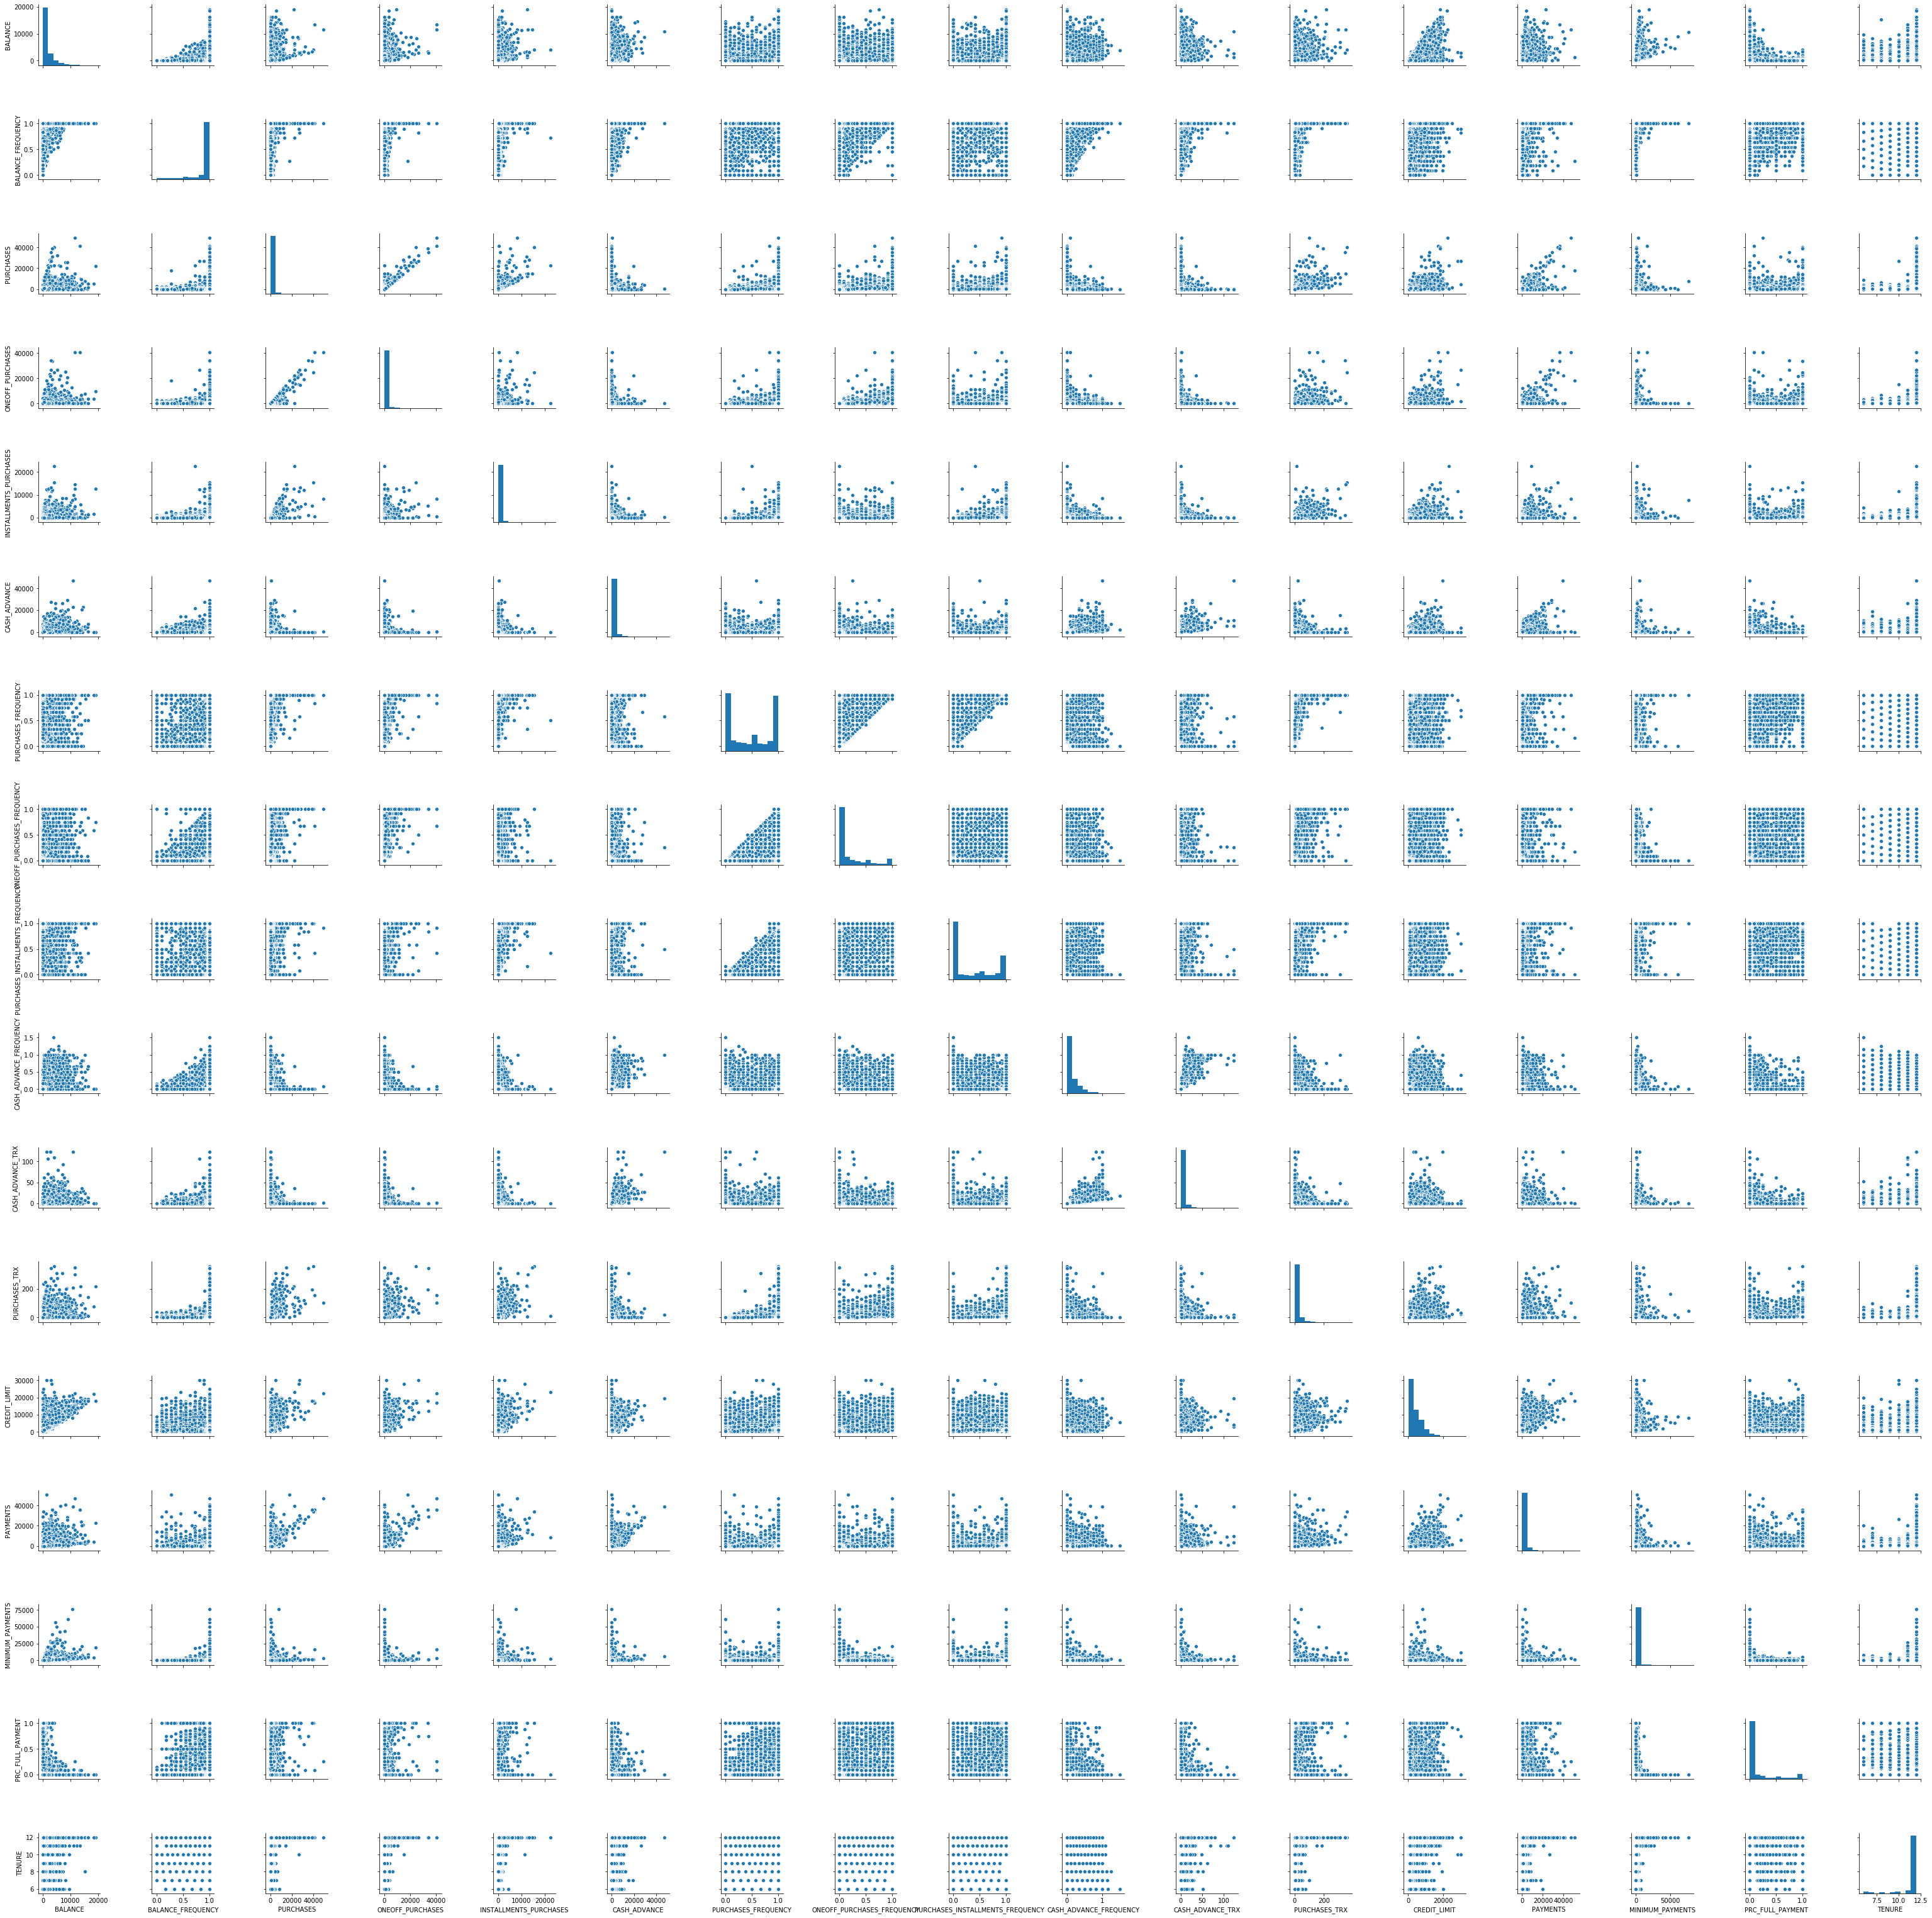

In [41]:
sns.pairplot(data)

In [0]:
# Remueve los valores faltantes
#data.dropna(axis=0, inplace=True)

In [0]:
# Remueve la columna CUST_ID
data = data.drop("CUST_ID", axis=1)

# 3 Agrupar los datos

## KMeans

(4, 17)
(8950,)
(8950,)


([], <a list of 0 Text yticklabel objects>)

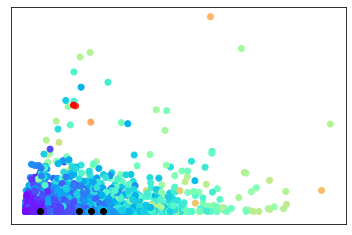

In [44]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4, random_state=0) # 4 clusters
kmeans.fit(data)
print(kmeans.cluster_centers_.shape)
print(kmeans.labels_.shape)

# Predice las mismas etiquetas, también se puede aplicar a nuevos datos
print(kmeans.predict(data).shape)

#plt.scatter(data[:, 0], data[:, 1], c=kmeans.labels_)
plt.scatter(data["BALANCE"], data["PURCHASES"], c=data["CREDIT_LIMIT"], cmap="rainbow")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], c="black")
plt.xticks(())
plt.yticks(())

## Elbow method

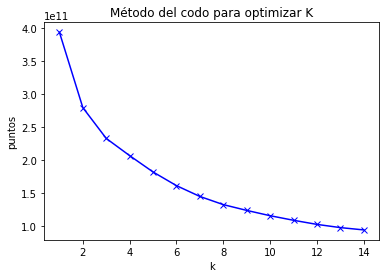

In [45]:
# Método de Elbow con datos sin escalar

puntos = list()
k = range(1, 15)
for K in k:
    kmeans = KMeans(n_clusters=K)
    kmeans = kmeans.fit(data)
    puntos.append([kmeans.inertia_])

plt.plot(k, puntos, "bx-")
plt.xlabel("k")
plt.ylabel("puntos")
plt.title("Método del codo para optimizar K")
plt.show()

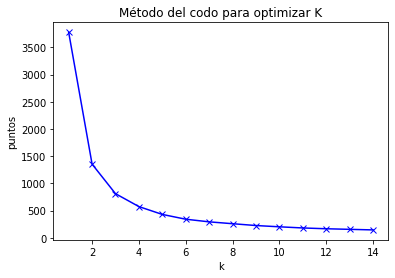

In [46]:
# Método de Elbow con datos escalados con PCA

from sklearn.decomposition import PCA

scaler = MinMaxScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

puntos = list()
k = range(1, 15)
for K in k:
    kmeans = KMeans(n_clusters=K)
    kmeans = kmeans.fit(X_pca)
    puntos.append([kmeans.inertia_])

plt.plot(k, puntos, "bx-")
plt.xlabel("k")
plt.ylabel("puntos")
plt.title("Método del codo para optimizar K")
plt.show()

## Hierarchical Clustering

In [0]:
from sklearn.cluster.hierarchical import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, ward, single, complete, average

# Escala los datos
scaler = MinMaxScaler()
scaler.fit(data)
X_scaled = scaler.transform(data)
pca = PCA(n_components=2)
pca.fit(X_scaled)
X_pca = pca.transform(X_scaled)

linkage="single"

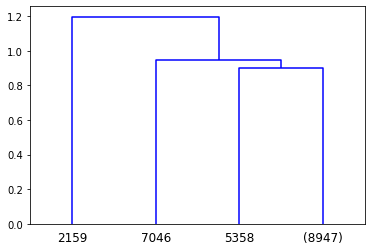

In [48]:
linkage_metrics = single(X_scaled)
dendrogram(linkage_metrics, p=2, truncate_mode="level")
plt.show()

linkage="ward"

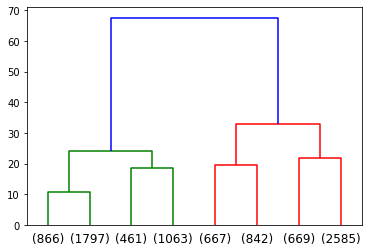

In [49]:
linkage_metrics = ward(X_scaled)
dendrogram(linkage_metrics, p=2, truncate_mode="level")
plt.show()

linkage="complete"

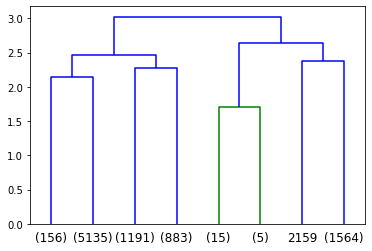

In [50]:
linkage_metrics = complete(X_scaled)
dendrogram(linkage_metrics, p=2, truncate_mode="level")
plt.show()

linkage="average"

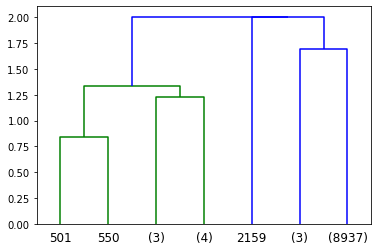

In [51]:
linkage_metrics = average(X_scaled)
dendrogram(linkage_metrics, p=2, truncate_mode="level")
plt.show()

## PCA

Original shape: (8950, 17)
Reduced shape: (8950, 2)


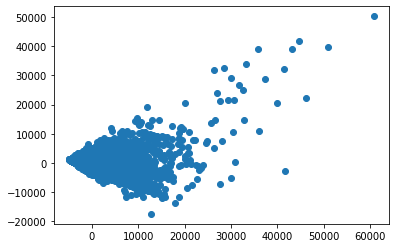

In [52]:
# PCA a los datos no escalados

pca = PCA(n_components=2)

pca.fit(data)

data_pca = pca.transform(data)
print("Original shape: {}".format(str(data.shape)))
print("Reduced shape: {}".format(str(data_pca.shape)))
plt.scatter(data_pca[:, 0], data_pca[:, 1])

Original shape: (8950, 17)
Reduced shape: (8950, 2)


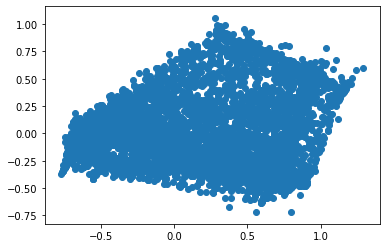

In [53]:
# PCA a los datos escalados

pca = PCA(n_components=2)

pca.fit(X_scaled)

X_pca = pca.transform(X_scaled)
print("Original shape: {}".format(str(data.shape)))
print("Reduced shape: {}".format(str(X_pca.shape)))
plt.scatter(X_pca[:, 0], X_pca[:, 1])

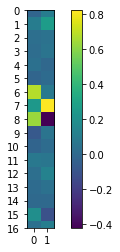

In [54]:
components = pca.components_
plt.imshow(components.T)
plt.yticks(range(data.shape[1]))
plt.colorbar()

In [55]:
pca.components_

array([[-1.50290407e-02,  1.01778732e-01,  3.28209554e-02,
         1.99890873e-02,  3.53330532e-02, -1.68949570e-02,
         6.85500432e-01,  2.42632337e-01,  6.37189203e-01,
        -7.40940231e-02, -2.03112257e-02,  7.48915354e-02,
         2.96402824e-02,  1.38303693e-02,  3.14319606e-04,
         1.94084222e-01,  3.69239717e-02],
       [ 9.88203615e-02,  2.66311291e-01,  4.76282257e-02,
         5.84966521e-02, -2.19880070e-03,  1.33651622e-02,
         8.05167568e-02,  8.22750732e-01, -4.23192629e-01,
         5.59295331e-02,  1.93396147e-02,  6.36496503e-02,
         1.30773560e-01,  4.31530291e-02,  3.51242095e-03,
        -1.12881625e-01,  1.08043651e-01]])